In [11]:
import clmm
import numpy as np
import matplotlib.pyplot as plt
from clmm import Cosmology
import h5py
import sacc

## True Shear versus Calibrated Shear

In the next cells, we are going to plot the shear cluster catalog generated by `TXPipe` with two options: using the true shear and true redshift, or using the calibrated shear and estimated redshift with the `BPZ` algorithm, whichw we denote here as the `False` options.

We downsample the data to be able to plot it.

In [2]:

# File paths
false_shear = '/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/outputs-lsst-france/scaling-relation-out_false//cluster_shear_catalogs.hdf5'
true_shear = '/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/outputs-lsst-france/scaling-relation-out/cluster_shear_catalogs.hdf5'

# Load data
with h5py.File(true_shear, 'r') as f:
    true_g1 = np.array(f['index']['g1'])
    true_distance = np.array(f['index']['distance_arcmin'])

with h5py.File(false_shear, 'r') as f:
    false_g1 = np.array(f['index']['g1'])
    false_distance = np.array(f['index']['distance_arcmin'])

# === DOWNSAMPLING FOR SCATTER ===
step = 10000
true_g1_sample = true_g1[::step]
true_distance_sample = true_distance[::step]
false_g1_sample = false_g1[::step]
false_distance_sample = false_distance[::step]

# === DOWNSAMPLING FOR HISTOGRAM ===
sample_size = 100000
true_hist_sample = np.random.choice(true_g1, size=min(sample_size, len(true_g1)), replace=False)
false_hist_sample = np.random.choice(false_g1, size=min(sample_size, len(false_g1)), replace=False)

# === SCATTER PLOTS ===
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(true_distance_sample, true_g1_sample, s=1, color='blue', alpha=0.5)
plt.title('True Shear (downsampled)')
plt.xlabel('Distance (arcmin)')
plt.ylabel('Shear g1')

plt.subplot(1, 2, 2)
plt.scatter(false_distance_sample, false_g1_sample, s=1, color='red', alpha=0.5)
plt.title('Calibrated Shear (downsampled)')
plt.xlabel('Distance (arcmin)')
plt.ylabel('Shear g1')
plt.tight_layout()
plt.show()

# === HISTOGRAMS (DOWNSAMPLED) ===
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(true_hist_sample, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of True Shear g1 (sampled)')
plt.xlabel('Shear g1')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(false_hist_sample, bins=50, color='red', alpha=0.7)
plt.title('Histogram of Calibrated Shear g1 (sampled)')
plt.xlabel('Shear g1')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# === RADIAL BINS WITH MEAN SHEAR ===
def binned_stat(x, y, bins):
    digitized = np.digitize(x, bins)
    bin_means = [y[digitized == i].mean() if np.any(digitized == i) else np.nan for i in range(1, len(bins))]
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    return bin_centers, np.array(bin_means)

bins = np.linspace(0, np.max(true_distance), 50)

true_centers, true_mean = binned_stat(true_distance, true_g1, bins)
false_centers, false_mean = binned_stat(false_distance, false_g1, bins)

# === PLOT BINNED MEAN SHEAR ===
plt.figure(figsize=(10, 6))
plt.plot(true_centers, true_mean, label='True Shear', color='blue')
plt.plot(false_centers, false_mean, label='Calibrated Shear', color='red')
plt.xlabel('Distance (arcmin)')
plt.ylabel('Mean Shear g1')
plt.title('Mean Shear vs Distance (binned)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

### True vs False sacc Files

Here we will plot the stacked shear profile stored in the Sacc file for both options. We are plotting only for one bin for easier comparison.


z_bin is [0.3, 0.4] 

rich_bin is [100.0, 200.00000000000003] 



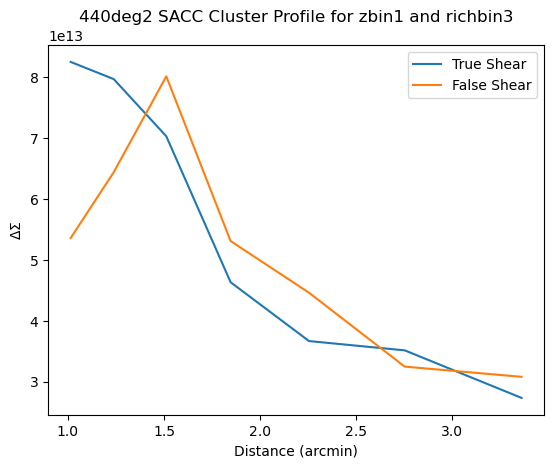

In [17]:
import sacc
sacc_file_440_true = '/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/outputs-lsst-france/scaling-relation-out/cluster_sacc_catalog.sacc'
t1 = sacc.Sacc.load_fits(sacc_file_440_true)
t1.data
data1 = []
radius1 = []
for i in range(0,7):
    trac = ('cosmodc2-440deg2-CL', 'bin_rich_3', 'bin_z_1', f'radius_{i}')
    data1.append(t1.get_data_points(sacc.data_types.standard_types.cluster_shear, trac)[0].value)
    radius = t1.tracers[f'radius_{i}'].center
    radius1.append(radius)
plt.plot(radius1, data1, label='True Shear')



sacc_file_440_false ='/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/outputs-lsst-france/scaling-relation-out_false/cluster_sacc_catalog.sacc'

t2 = sacc.Sacc.load_fits(sacc_file_440_false)
data2 = []
radius2 = []
for i in range(0,7):
    trac = ('cosmodc2-440deg2-CL', 'bin_rich_3', 'bin_z_1', f'radius_{i}')
    data2.append(t2.get_data_points(sacc.data_types.standard_types.cluster_shear, trac)[0].value)
    radius = t2.tracers[f'radius_{i}'].center
    radius2.append(radius)
plt.plot(radius2, data2, label='False Shear')

plt.title('440deg2 SACC Cluster Profile for zbin1 and richbin3')
plt.xlabel('Distance (arcmin)')
plt.ylabel('$\Delta \Sigma $')
plt.legend()
print(f'z_bin is [{t2.get_tracer('bin_z_1').lower}, {t2.get_tracer('bin_z_1').upper}] \n')
print(f'rich_bin is [{10**(t2.get_tracer('bin_rich_3').lower)}, {10**(t2.get_tracer('bin_rich_3').upper)}] \n')

## Plotting the Stacked profiles for both options

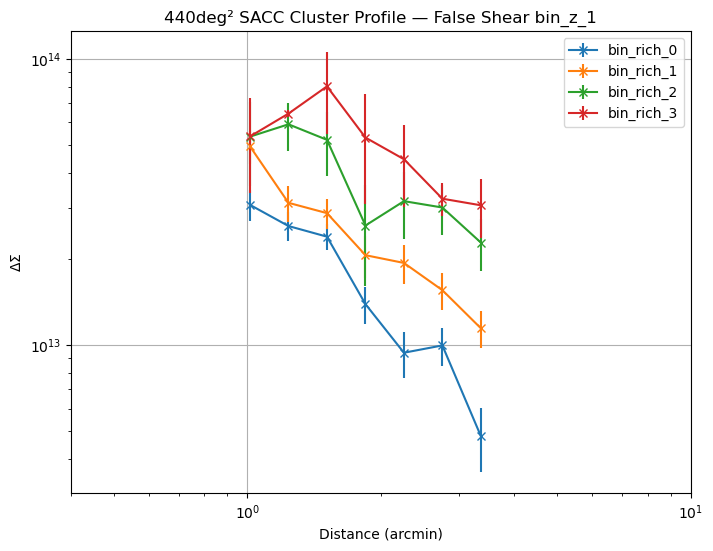

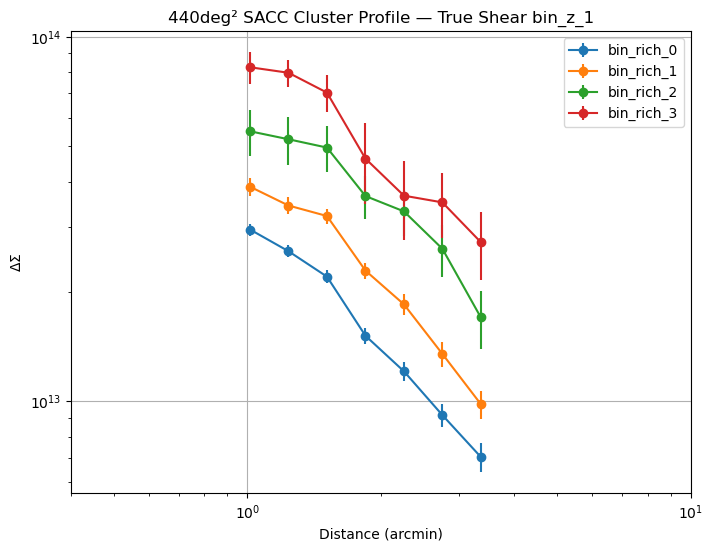

z_bin = [0.3, 0.4]
bin_rich_0 = [20.00, 35.00]
bin_rich_1 = [35.00, 70.00]
bin_rich_2 = [70.00, 100.00]
bin_rich_3 = [100.00, 200.00]


In [23]:
# File paths
sacc_file_true = '/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/outputs-lsst-france/scaling-relation-out/cluster_sacc_catalog.sacc'
sacc_file_false = '/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/outputs-lsst-france/scaling-relation-out_false/cluster_sacc_catalog.sacc'

# Load both SACC files
t_true = sacc.Sacc.load_fits(sacc_file_true)
t_false = sacc.Sacc.load_fits(sacc_file_false)

# Select fixed z bin
zbin = 'bin_z_1'

# -------- Plot for FALSE shear -----------------------------------------------------------------
plt.figure(figsize=(8, 6))
for rich_bin_index in range(4):
    rich_bin = f'bin_rich_{rich_bin_index}'

    data = []
    errors = []
    radius_vals = []

    for i in range(7):
        radius_key = f'radius_{i}'
        trac = ('cosmodc2-440deg2-CL', rich_bin, zbin, radius_key)
        radius = t_false.tracers[radius_key].center
        radius_vals.append(radius)

        dp = t_false.get_data_points(sacc.data_types.standard_types.cluster_shear, trac)[0].value
        idx = t_false.indices(sacc.data_types.standard_types.cluster_shear, trac)
        err = np.sqrt(t_false.covariance.covmat[idx][:, idx][0, 0])

        data.append(dp)
        errors.append(err)

    plt.errorbar(radius_vals, data, yerr=errors, label=rich_bin, marker='x')

plt.xlabel('Distance (arcmin)')
plt.ylabel(r'$\Delta \Sigma$')
plt.title(f'440deg² SACC Cluster Profile — False Shear {zbin}')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.4, 10)
plt.legend()
plt.grid(True)
plt.show()

# -------- Plot for TRUE shear -------------------------------------------------------------
plt.figure(figsize=(8, 6))
for rich_bin_index in range(4):
    rich_bin = f'bin_rich_{rich_bin_index}'

    data = []
    errors = []
    radius_vals = []

    for i in range(7):
        radius_key = f'radius_{i}'
        trac = ('cosmodc2-440deg2-CL', rich_bin, zbin, radius_key)

        radius = t_true.tracers[radius_key].center
        radius_vals.append(radius)

        dp = t_true.get_data_points(sacc.data_types.standard_types.cluster_shear, trac)[0].value
        idx = t_true.indices(sacc.data_types.standard_types.cluster_shear, trac)
        err = np.sqrt(t_true.covariance.covmat[idx][:, idx][0, 0])

        data.append(dp)
        errors.append(err)

    plt.errorbar(radius_vals, data, yerr=errors, label=rich_bin, marker='o')

plt.xlabel('Distance (arcmin)')
plt.ylabel(r'$\Delta \Sigma$')
plt.title(f'440deg² SACC Cluster Profile — True Shear {zbin}')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.4, 10)
plt.legend()
plt.grid(True)
plt.show()

# -------- Print bin limits --------
z_range = t_false.get_tracer(zbin)
print(f'z_bin = [{z_range.lower}, {z_range.upper}]')

for rich_bin_index in range(4):
    rich_bin = f'bin_rich_{rich_bin_index}'
    r = t_false.get_tracer(rich_bin)
    print(f'{rich_bin} = [{10**r.lower:.2f}, {10**r.upper:.2f}]')

### Comparison with Constantin's Payerne baseline from https://arxiv.org/abs/2502.08444

We will compare the True shear option with the baseline developed in the cited paper.

[np.float64(1.0143084577526502), np.float64(1.2381675886118961), np.float64(1.5119418592331362), np.float64(1.8466187143098525), np.float64(2.2548105212804135), np.float64(2.7527656092117168), np.float64(3.3612607145668028)]
1.0143084577526502 3.3612607145668028


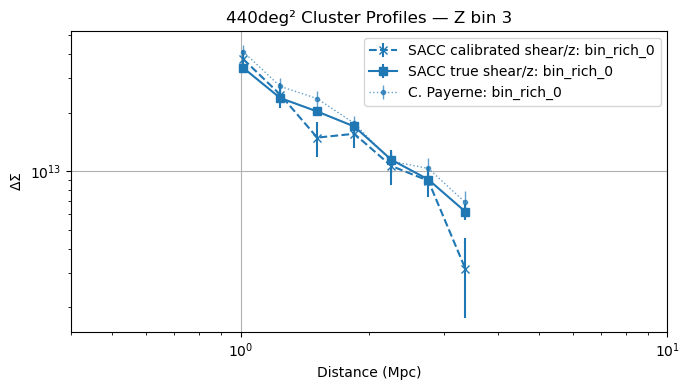

[np.float64(1.0143084577526502), np.float64(1.2381675886118961), np.float64(1.5119418592331362), np.float64(1.8466187143098525), np.float64(2.2548105212804135), np.float64(2.7527656092117168), np.float64(3.3612607145668028)]
1.0143084577526502 3.3612607145668028


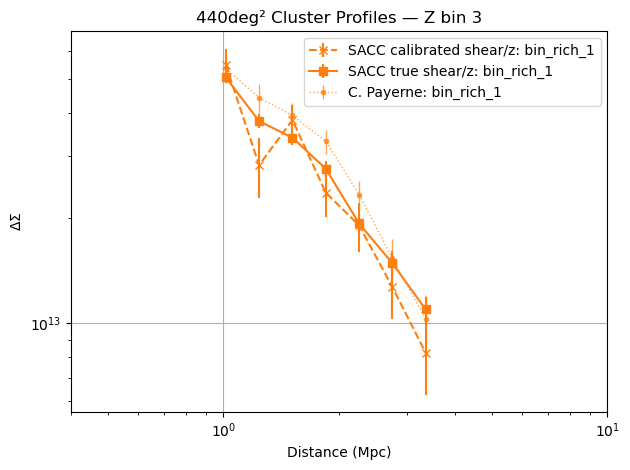

[np.float64(1.0143084577526502), np.float64(1.2381675886118961), np.float64(1.5119418592331362), np.float64(1.8466187143098525), np.float64(2.2548105212804135), np.float64(2.7527656092117168), np.float64(3.3612607145668028)]
1.0143084577526502 3.3612607145668028


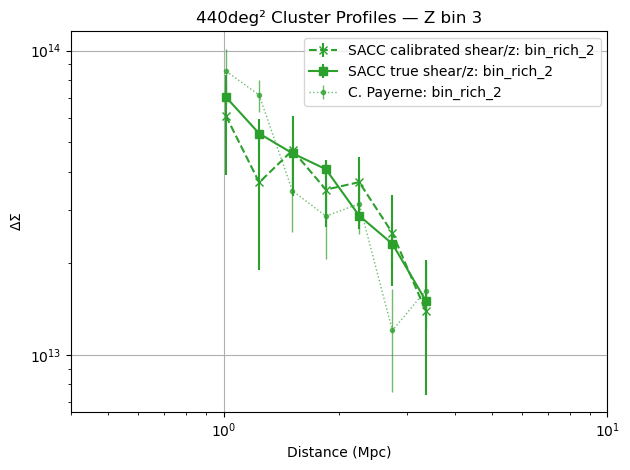

[np.float64(1.0143084577526502), np.float64(1.2381675886118961), np.float64(1.5119418592331362), np.float64(1.8466187143098525), np.float64(2.2548105212804135), np.float64(2.7527656092117168), np.float64(3.3612607145668028)]
1.0143084577526502 3.3612607145668028


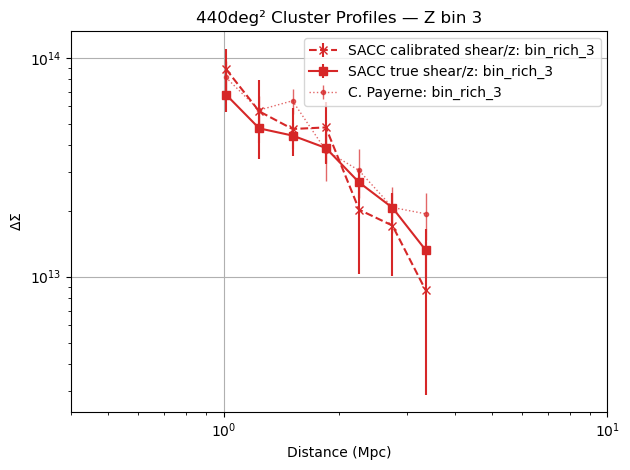

In [31]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sys

sys.path.append('/sps/lsst/users/ebarroso/CLCosmo_Sim')
import _redshift_richness_bins as analysis

# Load data
plt.figure(figsize=(7, 4))
index = 12
suff = '_full_coverage'
path_to_data = '/sps/lsst/users/ebarroso/CLCosmo_Sim_database/data/'
data = np.load(path_to_data + f'stacked_esd_profiles_redmapper_true{suff}.pkl', allow_pickle=True)
profiles = data['stacked profile']
covariances = data['stacked covariance']

Z_bin = analysis.Z_bin
Obs_bin = analysis.Obs_bin
n_z_bin = len(Z_bin)
n_m_bin = len(Obs_bin)

# Color map
cmap = plt.get_cmap('tab10')

z_bin_index = 2
z_bin = Z_bin[z_bin_index]

# Loop over richness bins
for rich_bin_index in range(4):
    rich_bin = f'bin_rich_{rich_bin_index}'
    color = cmap(rich_bin_index)

    data_false = []
    data_true = []
    data_false_error = []
    data_true_error = []
    radius_vals = []
    
    for i in range(7):
        radius_key = f'radius_{i}'
        z_str = f'bin_z_{z_bin_index}'  # Ensure this matches the tracer naming in SACC
        trac = ('cosmodc2-440deg2-CL', rich_bin, z_str, radius_key)


        # Assume t_false and t_true already exist
        radius = t_false.tracers[radius_key].center
        radius_vals.append(radius)

        # FALSE (dashed line)
        data_val_f = t_false.get_data_points(sacc.data_types.standard_types.cluster_shear, trac)[0].value
        index_f = t_false.indices(sacc.data_types.standard_types.cluster_shear, trac)
        err_f = np.sqrt(t_false.covariance.covmat[index_f][:, index_f][0, 0])
        data_false.append(data_val_f)
        data_false_error.append(err_f)

        # TRUE (solid line)
        data_val_t = t_true.get_data_points(sacc.data_types.standard_types.cluster_shear, trac)[0].value
        index_t = t_true.indices(sacc.data_types.standard_types.cluster_shear, trac)
        err_t = np.sqrt(t_true.covariance.covmat[index_t][:, index_t][0, 0])
        data_true.append(data_val_t)
        data_true_error.append(err_t)

    # Plot SACC profiles
    print(radius_vals)
    plt.errorbar(radius_vals, data_false, yerr=data_false_error,
                 label=f'SACC calibrated shear/z: {rich_bin}', marker='x', color=color, linestyle='--')

    plt.errorbar(radius_vals, data_true, yerr=data_true_error,
                 label=f'SACC true shear/z: {rich_bin}', marker='s', color=color, linestyle='-')

    # Overlay original profile from file
    m_bin = Obs_bin[rich_bin_index]
    mask_z = (profiles['z_mean'] > z_bin[0]) & (profiles['z_mean'] < z_bin[1])
    mask_m = (profiles['obs_mean'] > m_bin[0]) & (profiles['obs_mean'] < m_bin[1])
    index_cut = np.where(mask_z & mask_m)[0]

    if len(index_cut) > 0:
        f_cut = profiles[index_cut]
        cov = np.array(covariances['cov_t'][index_cut[0]])  # Get single 2D covariance matrix

        radius_orig = f_cut['radius'][0]
        gt_orig = f_cut['gt'][0]
        err_orig = np.sqrt(np.diag(cov))

        # Filter to SACC-like radii range
        r_sacc_min, r_sacc_max = min(radius_vals), max(radius_vals)
        print(r_sacc_min, r_sacc_max)
        mask_radius = (radius_orig >= 1.0) & (radius_orig <= 3.5)

        radius_filtered = radius_orig[mask_radius]
        gt_filtered = gt_orig[mask_radius]
        err_filtered = err_orig[mask_radius]

        plt.errorbar(radius_filtered, gt_filtered, err_filtered,
                     label=f'C. Payerne: {rich_bin}', fmt=':', color=color,
                     elinewidth=1, linewidth=1, markersize=3, marker='o', alpha=0.7)


    plt.xlabel('Distance (Mpc)')
    plt.ylabel(r'$\Delta \Sigma$')
    plt.title(f'440deg² Cluster Profiles — Z bin {z_bin_index + 1}')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(0.4, 10)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
